In [1]:
setwd('E:/notebook/miMatch')
library(plyr) 
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(cowplot)

Warning message:
"package 'plyr' was built under R version 4.2.2"
Warning message:
"package 'ggplot2' was built under R version 4.2.2"

Attaching package: 'ggpubr'


The following object is masked from 'package:plyr':

    mutate


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.4      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
Warning message:
"package 'readr' was built under R version 4.2.2"
Warning message:
"package 'stringr' was built under R version 4.2.2"
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks ggpubr::mutate(

# Find IBD studies

In [2]:
data<-read.csv("Label/fenzu.csv",stringsAsFactors = F,row.names = 1)
IBD<-data[which(data$condition2=="IBD"),]
rownames(IBD)
path = "E:/notebook/miMatch/Temp"
fileName = dir(path)
fileName = fileName[which(fileName%in%rownames(IBD))]
fileName

[1] "27"   "36"   "38"   "48_1" "59"

[1] "27"   "36"   "38"   "48_1" "59"

In [3]:
filePath <- sapply(fileName, function(x){ 
  paste(path,x,"Metadata.csv",sep="/")})   
data <- lapply(filePath, function(x){
  read.csv(x, header=T)}) 
#list to dataframe
metadata=data[[1]]
for (i in 2:length(data)) {
  metadata<-rbind(metadata,data[[i]])
}
#NA delete
metadata=metadata[, apply(metadata, 2, function(y) any(!is.na(y)))]
#colnames(metadata)
head(metadata)
#write.csv(metadata,"Temp/IBDmetadata.csv",row.names = F)

,study_name,sample_id,subject_id,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,visit_number,disease_subtype,treatment,disease_location,calprotectin,HBI,SCCAI,remission,mgs_richness,ferm_milk_prod_consumer
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,HallAB_2017,SKST006_6_G102964,SKST006,stool,NA,IBD,IBD,NA,adult,NA,⋯,6,UC,NA,NA,NA,NA,NA,NA,NA,NA
2,HallAB_2017,SKST006_7_G102965,SKST006,stool,NA,IBD,IBD,NA,adult,NA,⋯,7,UC,NA,NA,NA,NA,NA,NA,NA,NA
3,HallAB_2017,SKST006_4_G102962,SKST006,stool,NA,IBD,IBD,NA,adult,NA,⋯,4,UC,NA,NA,NA,NA,NA,NA,NA,NA
4,HallAB_2017,SKST006_5_G102963,SKST006,stool,NA,IBD,IBD,NA,adult,NA,⋯,5,UC,NA,NA,NA,NA,NA,NA,NA,NA
5,HallAB_2017,SKST006_2_G102960,SKST006,stool,NA,IBD,IBD,NA,adult,NA,⋯,2,UC,NA,NA,NA,NA,NA,NA,NA,NA
6,HallAB_2017,SKST006_3_G102961,SKST006,stool,NA,IBD,IBD,NA,adult,NA,⋯,3,UC,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
filePath <- sapply(fileName, function(x){ 
  paste(path,x,"PSMLabel.csv",sep="/")})   
data <- lapply(filePath, function(x){
  read.csv(x,stringsAsFactors = F,row.names = 1)}) 
PSMlabel=data[[1]]
for (i in 2:length(data)) {
  PSMlabel<-rbind(PSMlabel,data[[i]],by="micro")
}
PSMlabel<-PSMlabel[-which(PSMlabel$Case=="micro"),]
PSMlabel
#write.csv(PSMlabel,"Temp/IBDMatchedLabel.csv",row.names = F)

,Case,Control
,<chr>,<chr>
0,SKST006_6_G102964,SKST007_6_G102995
1,SKST006_6_G102964,SKST010_1_G102968
2,SKST006_6_G102964,SKST041_3_G103028
3,SKST006_7_G102965,SKST037_2_G103023
4,SKST006_7_G102965,p9223_mo6
5,SKST006_7_G102965,p9281_mo5
6,SKST006_4_G102962,SKST012_6_G102997
7,SKST006_4_G102962,SKST036_3_G103025
8,SKST006_4_G102962,SKST010_8_G102998


# unmatched cohort ----  matched cohort

## unmatched cohorts: cases vs. controls

In [5]:
metadata<-read.csv("Temp/IBDmetadata.csv",stringsAsFactors = F)
unmatched_metaplot<-data.frame(study_name=rep(metadata$sample_id,2),
                     study_condition=rep(metadata$study_condition,2),
                     Group=rep(c("age","BMI"),each=nrow(metadata)),
                     index=c(metadata$age,metadata$BMI))
msd<-na.omit(unmatched_metaplot)
aggregate(msd$index,
          by=list(msd$study_condition,msd$Group),
          mean_sd)# list[,3]: mean mean-sd mean+sd

Group.1,Group.2,x
<chr>,<chr>,"<list[,3]>"
control,age,"36.91408, 16.53358, 57.29459"
IBD,age,"28.38182, 11.26313, 45.5005"
control,BMI,"25.31239, 18.42916, 32.19563"
IBD,BMI,"23.24461, 16.61452, 29.8747"


Warning message:
"The dot-dot notation (`..p.format..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(p.format)` instead."
Warning message:
"Removed 1200 rows containing non-finite values (`stat_compare_means()`)."
Warning message:
"Removed 1200 rows containing non-finite values (`stat_boxplot()`)."


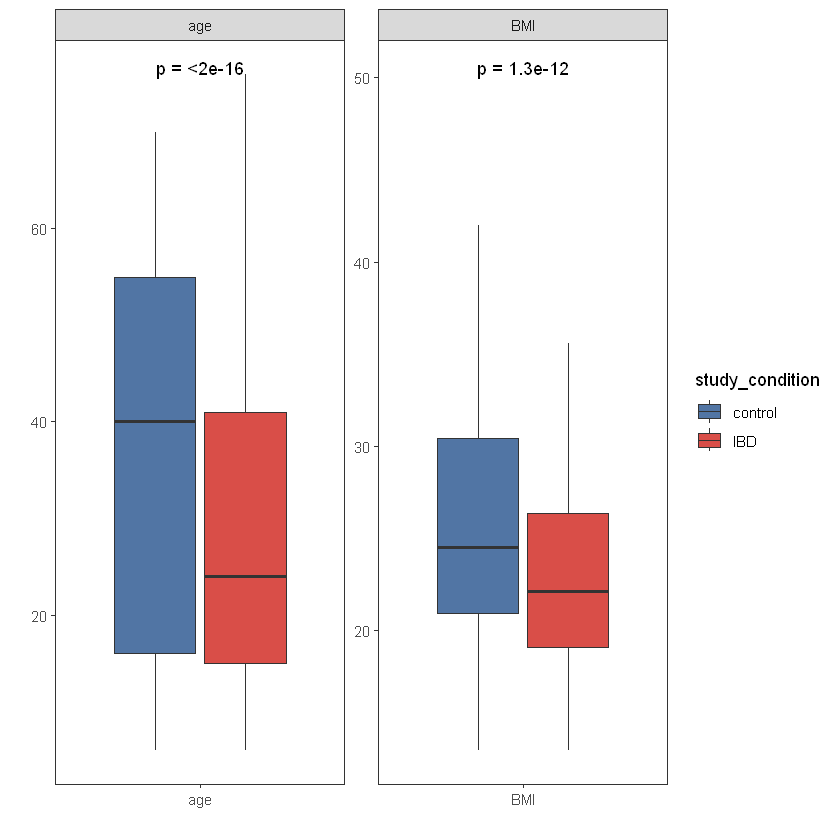

In [6]:
unmatched_metaplot$study_condition<-factor(unmatched_metaplot$study_condition,levels=c("control","IBD"))
ggplot(unmatched_metaplot, aes(x=Group, y=index, fill=study_condition)) + 
  stat_compare_means(label = "p.format",method = "wilcox.test")+
  geom_boxplot(outlier.shape = NA) +
  scale_fill_manual(values = c("#5175A4","#D94E48"))+
  xlab("")+ylab("")+
  facet_wrap(~Group, scale="free",nrow=1)+
  theme_bw() + theme(panel.grid=element_blank())

     
      control  IBD
  CHN       7    0
  DNK     180    0
  ESP      71  288
  GBR      38   56
  USA     500 1386

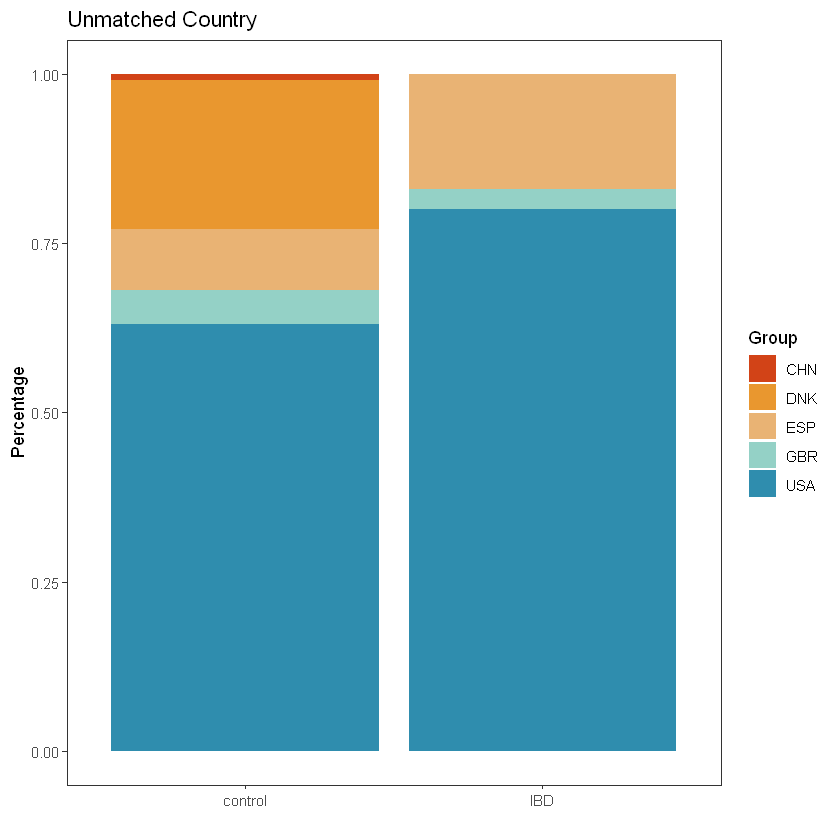

In [7]:
# Country-unmatched
table(metadata$country,metadata$study_condition)
unCountry<-data.frame(study_condition=rep(c("control","IBD"),each=5),
                      Group=rep(c("CHN","DNK","ESP","GBR","USA"),2),
                      index=c(0.01,0.22,0.09,0.05,0.63,0,0,0.17,0.03,0.8))

ggplot(unCountry,aes(study_condition,index,fill=Group))+
  geom_bar(stat="identity",position="stack")+
  ggtitle("Unmatched Country")+
  theme_bw()+
  theme(axis.ticks.length=unit(0.5,'cm'))+
  xlab("")+ylab("Percentage")+
  scale_fill_manual(values = c("#D24317","#E9972F","#E9B374","#94D1C6","#2F8DAE"))+
  theme_bw() + theme(panel.grid=element_blank())

## matched cohorts: cases vs. controls

In [9]:
PSMlabel<-read.csv("Temp/IBDMatchedLabel.csv")
IBDmeta<-data.frame(sample_id=PSMlabel$Case)
IBDmeta<-join(IBDmeta,metadata,match="first")
controlmeta<-data.frame(sample_id=PSMlabel$Control)
controlmeta<-join(controlmeta,metadata,match="first")

f_metaplot<-data.frame(cID=controlmeta$sample_id,
                       IBDid=IBDmeta$sample_id,
                       study_condition1=rep("control",2023),
                       study_condition2=rep("IBD",2023),
                       Age1=controlmeta$age,
                       Age2=IBDmeta$age,
                       BMI1=controlmeta$BMI,
                       BMI2=IBDmeta$BMI,
                       Country1=controlmeta$country,
                       Country2=IBDmeta$country,
                       Gender1=controlmeta$gender,
                       Gender2=IBDmeta$gender)

Joining by: sample_id

Joining by: sample_id



In [10]:
matchedData<-data.frame(ID=rep(1:2023,2),
                     sample_id=c(f_metaplot$cID,f_metaplot$IBDid),
                     study_condition=rep(c("control","IBD"),each=2023),
                     Age=c(f_metaplot$Age1,f_metaplot$Age2),
                     BMI=c(f_metaplot$BMI1,f_metaplot$BMI2),
                     Gender=c(f_metaplot$Gender1,f_metaplot$Gender2),
                     Country=c(f_metaplot$Country1,f_metaplot$Country2))
#write.csv(matchedData,"Temp/IBDMatchedMetadata.csv",row.names = F)

In [12]:
f_metaplot<-na.omit(f_metaplot)
matched_metaplot<-data.frame(ID=rep(1:870,2),
                             sample_id=c(f_metaplot$cID,f_metaplot$IBDid),
                             study_condition=rep(c("control","IBD"),each=870),
                             Age=c(f_metaplot$Age1,f_metaplot$Age2),
                             BMI=c(f_metaplot$BMI1,f_metaplot$BMI2))
#write.csv(matched_metaplot,"Temp/IBDMatched_delNA_Metadata.csv",row.names = F)
aggregate(matched_metaplot$Age,
          by=list(matched_metaplot$study_condition),
          mean_sd)
aggregate(matched_metaplot$BMI,
          by=list(matched_metaplot$study_condition),
          mean_sd)

Group.1,x
<chr>,"<list[,3]>"
control,"30.93103, 10.54472, 51.31735"
IBD,"28.03678, 11.13454, 44.93902"


Group.1,x
<chr>,"<list[,3]>"
control,"23.48782, 16.05632, 30.91931"
IBD,"23.25115, 16.54933, 29.95297"


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


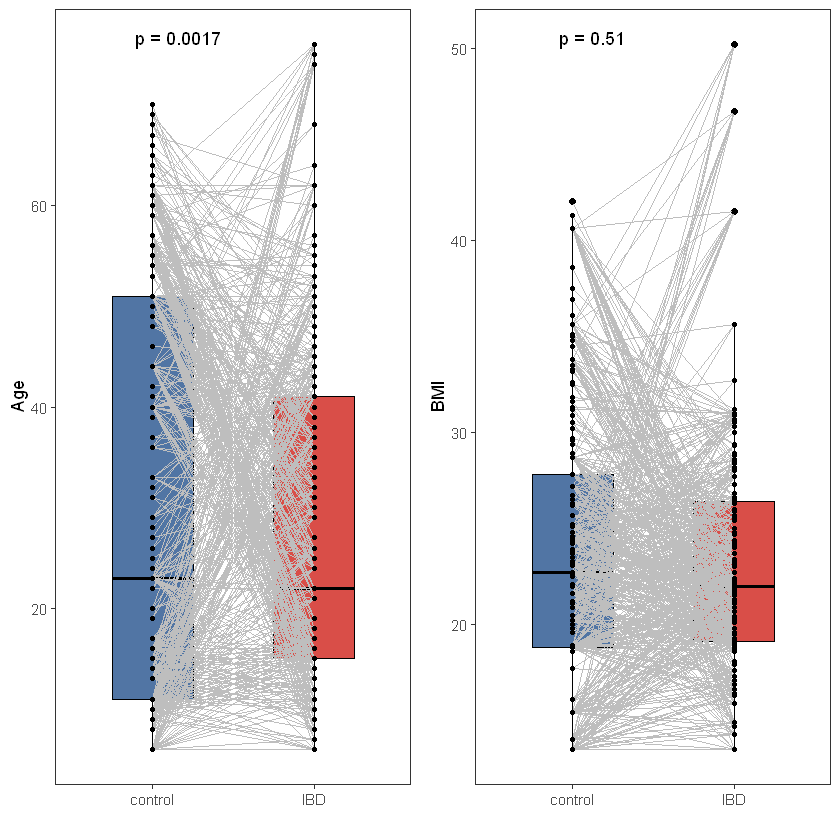

In [13]:
p1=ggpaired(matched_metaplot, x = 'study_condition', y = 'Age',id='ID',
            fill = 'study_condition', palette = "jco", 
            line.color = "gray", line.size = 0.1,
            short.panel.labs = FALSE)+
  scale_fill_manual(values = c("#5175A4","#D94E48"))+
  labs(x="",y = "Age")+
  stat_compare_means(label = "p.format",method = "wilcox.test",paired = T)+
  theme_bw() + theme(panel.grid=element_blank(),legend.position="none")

p2=ggpaired(matched_metaplot, x = 'study_condition', y = 'BMI',id='ID',
            fill = 'study_condition', palette = "jco", 
            line.color = "gray", line.size = 0.1,
            short.panel.labs = FALSE)+
  scale_fill_manual(values = c("#5175A4","#D94E48"))+
  labs(x="",y = "BMI")+
  stat_compare_means(label = "p.format",method = "wilcox.test",paired = T)+
  theme_bw() + theme(panel.grid=element_blank(),legend.position="none")

plot_grid(p1,p2, nrow = 1, align = "v")

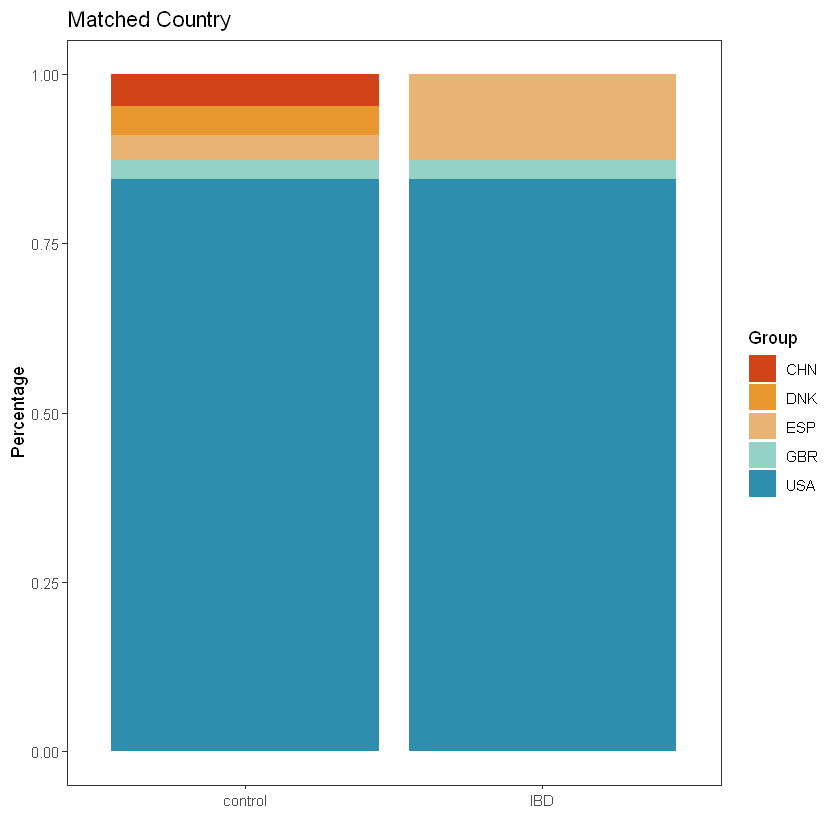

In [14]:
Country<-data.frame(study_condition=rep(c("control","IBD"),each=5),
                    Group=rep(c("CHN","DNK","ESP","GBR","USA"),2),
                    index=c(0.048,0.043,0.037,0.027,0.846,0,0,0.127,0.027,0.846))

ggplot(Country,aes(study_condition,index,fill=Group))+
  geom_bar(stat="identity",position="stack")+
  ggtitle("Matched Country")+
  theme_bw()+
  theme(axis.ticks.length=unit(0.5,'cm'))+
  xlab("")+ylab("Percentage")+
  scale_fill_manual(values = c("#D24317","#E9972F","#E9B374","#94D1C6","#2F8DAE"))+
  theme_bw() + theme(panel.grid=element_blank())